In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Reading Data From CSV**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Python For Data Sciene/Pandas/Operations on Dataframes/loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')

In [3]:
#DISPLAY DATA
pd.options.display.float_format = '{:.2f}'.format
data.head

<bound method NDFrame.head of             id member_id  ... total_bc_limit total_il_high_credit_limit
0      1077501   1296599  ...            NaN                        NaN
1      1077430   1314167  ...            NaN                        NaN
2      1077175   1313524  ...            NaN                        NaN
3      1076863   1277178  ...            NaN                        NaN
4      1075358   1311748  ...            NaN                        NaN
...        ...       ...  ...            ...                        ...
39712    92187     92174  ...            NaN                        NaN
39713    90665     90607  ...            NaN                        NaN
39714    90395     90390  ...            NaN                        NaN
39715    90376     89243  ...            NaN                        NaN
39716    87023     86999  ...            NaN                        NaN

[39717 rows x 111 columns]>

In [4]:
#NUMBER OF ROWS AND COLUMNS
print(data.shape)
print(data.info())

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB
None


In [5]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# **Data Cleaning**

In [6]:
#MISSING VALUES IN EACH COLUMN
data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
#CHECKING HOW MANY COLUMNS HAVE MISSING VALUES EQUAL TO THAT OF ROWS
missingValueData = data.isnull().sum() / len(data)
missingValueDataFrame = pd.DataFrame({'column_missing_value' : data.columns,
                                'missingValueData' : missingValueData.round(2)})
#SORTING DATAFRAME
missingValueDataFrame.sort_values('missingValueData', inplace = True)
(missingValueDataFrame['missingValueData'] == 1.0).sum()

54

In [8]:
#FETCHING THE COLUMN THAT HAVE SAME VALUES AS NUMBER OF ROWS
ColumnsWithMissingValues = missingValueDataFrame[(missingValueDataFrame['missingValueData'] == 1.0)].column_missing_value.tolist()

In [9]:
#Dropping the columns with most null values equal to rows 
data = data.drop(ColumnsWithMissingValues, axis = 1)

In [10]:
data.columns
data.shape

(39717, 57)

In [11]:
(data.isnull().sum()).sort_values(ascending = False)

next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12940
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
collection_recovery_fee           0
acc_now_delinq                    0
application_type                  0
url                               0
pymnt_plan                        0
loan_status                       0
issue_d                           0
verification_status               0
annual_inc                        0
home_ownership                    0
delinq_amnt                       0
sub_grade                         0
grade                             0
installment                 

In [12]:
#These columns have more than 50 percent Missing Values So we can drop them [mths_since_last_delinq,desc,mths_since_last_record]
data = data.drop(['desc','mths_since_last_delinq','mths_since_last_record','next_pymnt_d'], axis = 1)

In [13]:
#DROPPING VALUES WHICH HAVE SAME VALUES IN ALL ROWS
data = data.drop(['pymnt_plan', 'policy_code', 'application_type','id','member_id','collections_12_mths_ex_med','chargeoff_within_12_mths',
                  'tax_liens','url','delinq_amnt','acc_now_delinq','emp_title','initial_list_status'], axis=1)

In [14]:
#After dropping all columns which are not required for analysis
data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
#Finally seeing the missing values(6 values which have missing values)
(data.isnull().sum()).sort_values(ascending = False)

emp_length                 1075
pub_rec_bankruptcies        697
last_pymnt_d                 71
revol_util                   50
title                        11
last_credit_pull_d            2
annual_inc                    0
zip_code                      0
purpose                       0
loan_status                   0
issue_d                       0
verification_status           0
funded_amnt                   0
addr_state                    0
sub_grade                     0
grade                         0
installment                   0
int_rate                      0
term                          0
funded_amnt_inv               0
home_ownership                0
delinq_2yrs                   0
dti                           0
earliest_cr_line              0
last_pymnt_amnt               0
collection_recovery_fee       0
recoveries                    0
total_rec_late_fee            0
total_rec_int                 0
total_rec_prncp               0
total_pymnt_inv               0
total_py

# **UNIQUE CATEGORICAL COLUMNS**

In [16]:
#NUMBER OF IDENTICAL COLUMNS
identical_Category = data.nunique(axis = 0).sort_values(ascending = True)

In [17]:
identical_Category.head(20)

term                      2
pub_rec_bankruptcies      3
loan_status               3
verification_status       3
pub_rec                   5
home_ownership            5
grade                     7
inq_last_6mths            9
delinq_2yrs              11
emp_length               11
purpose                  14
sub_grade                35
open_acc                 40
addr_state               50
issue_d                  55
total_acc                82
last_pymnt_d            101
last_credit_pull_d      106
int_rate                371
earliest_cr_line        526
dtype: int64

# **FILLING THE MISSING VALUES AS THE MODE VALUE AS PERCENT IS LESS THAN 10 PERCENT**

In [18]:
#AS THE MISSING VALUES IN THE COLUMNS ARE LESS THE 10 PERCENT , WE CAN FILL THE MISSING VALUES BY EXTRACTING THROUGH MODE 
#emp_length
data['emp_length'].value_counts()
data['emp_length'].mode()
#Extracting string from this value
data['emp_length'].mode()[0]

'10+ years'

In [19]:
#Filling the values
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])

In [20]:
#pub_rec_bankruptcies
data['pub_rec_bankruptcies'].value_counts()
data['pub_rec_bankruptcies'].mode()
#Extracting string from this value
data['pub_rec_bankruptcies'].mode()[0]

#Filling the values
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

In [21]:
#revol_util
data['revol_util'].value_counts()
data['revol_util'].mode()
#Extracting string from this value
data['revol_util'].mode()[0]

#Filling the values
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].mode()[0])

In [22]:
#Since missing values are quite low, we can leave columns as it is.
data.shape

(39717, 40)

In [23]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0
1,2500,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40%,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0


# **REMOVING EXTRA DATA FROM COLUMNS AND CREATING DERIVED COLUMNS**

In [24]:
#Removing months from term column
data['term'] = data['term'].map(lambda x : x.strip('months'))
data['term'].value_counts()

 36     29096
 60     10621
Name: term, dtype: int64

In [25]:
#int_rate column can be converted to numerical column
data['int_rate'] = data['int_rate'].map(lambda x : x.strip('%'))
data['int_rate'].value_counts()

10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
16.96      1
16.71      1
20.52      1
17.46      1
16.15      1
Name: int_rate, Length: 371, dtype: int64

In [26]:
#Removing % from revol_util column
data['revol_util'] = data['revol_util'].astype(str).str.replace('%', '')

In [27]:
#Removing '+' ,'years 'and making '< 1 year' into 0.5
data['emp_length'] = data['emp_length'].map(lambda x : x.strip('years '))
data['emp_length'] = data['emp_length'].map(lambda x : x.strip('+'))
data['emp_length'][data['emp_length'] == '< 1'] = '0.5'


In [28]:
#issue_d column will be converted into 2 numerical columns and similarly for other 2 columns
data['last_credit_pull_d_month'], data['last_credit_pull_d_year'] = data['last_credit_pull_d'].str.split('-').str

data.issue_d = pd.to_datetime(data.issue_d, format = '%b-%y')
data['issue_d_year'] = data['issue_d'].dt.year
data['issue_d_month'] = data['issue_d'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  


In [29]:
data.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,last_credit_pull_d_month,last_credit_pull_d_year,issue_d_year,issue_d_month
0,5000,5000,4975,36,10.65,162.87,B,B2,10,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,0,0,5863.155187,5833.84,5000,863.16,0,0,0,Jan-15,171.62,May-16,0,May,16,2011,12
1,2500,2500,2500,60,15.27,59.83,C,C4,0.5,RENT,30000,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1,0,Apr-99,5,3,0,1687,9.40,4,0,0,1008.71,1008.71,456.46,435.17,0,117.08,1.11,Apr-13,119.66,Sep-13,0,Sep,13,2011,12


In [30]:
#Some Observations on Loan_status
(data.loan_status.value_counts() * 100)/len(data)

Fully Paid    82.96
Charged Off   14.17
Current        2.87
Name: loan_status, dtype: float64

In [31]:
#Observation on Purpose
(data.purpose.value_counts() * 100)/len(data)

debt_consolidation   46.93
credit_card          12.92
other                10.05
home_improvement      7.49
major_purchase        5.51
small_business        4.60
car                   3.90
wedding               2.38
medical               1.74
moving                1.47
vacation              0.96
house                 0.96
educational           0.82
renewable_energy      0.26
Name: purpose, dtype: float64

In [32]:
#Analysis on Term Column
(data.term.value_counts() * 100)/len(data)

 36    73.26
 60    26.74
Name: term, dtype: float64

In [33]:
#Analysis on Employment Years Column
(data.emp_length.value_counts() * 100)/len(data)

10    25.06
0.5   11.54
2     11.05
3     10.31
4      8.65
5      8.26
1      8.16
6      5.61
7      4.46
8      3.72
9      3.17
Name: emp_length, dtype: float64

# **CHECKING THE COLUMNS AND THEIR TYPES**


*   Converting these into their specific data types



In [34]:
#Category Type
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'inq_last_6mths', 'open_acc', 'pub_rec_bankruptcies','delinq_2yrs']
data[columns] = data[columns].apply(lambda x : x.astype('category'))

#Int Type
columns = ['total_acc', 'term', 'issue_d_year']

data[columns] = data[columns].astype("int32")

#Float Type
columns = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'out_prncp',
          'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee']
data[columns] = data[columns].astype(np.float)

In [35]:
#FinancialLossOrGain To Company
data['FinancialGainOrLoss'] = (data['total_pymnt'] - data['funded_amnt']) * 100 / data['funded_amnt']
data['FinancialGainOrLoss']

0        17.26
1       -59.65
2        25.24
3        22.32
4        17.11
         ...  
39712    12.92
39713    16.63
39714     5.44
39715     3.48
39716    22.60
Name: FinancialGainOrLoss, Length: 39717, dtype: float64

In [36]:
data['yearly_income_lakhs'] = data['annual_inc'] / 1000

In [37]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,last_credit_pull_d_month,last_credit_pull_d_year,issue_d_year,issue_d_month,FinancialGainOrLoss,yearly_income_lakhs
0,5000.00,5000.00,4975.00,36,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648.00,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,May,16,2011,12,17.26,24.00
1,2500.00,2500.00,2500.00,60,15.27,59.83,C,C4,0.50,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687.00,9.40,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,Sep,13,2011,12,-59.65,30.00
2,2400.00,2400.00,2400.00,36,15.96,84.33,C,C5,10.00,RENT,12252.00,Not Verified,2011-12-01,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956.00,98.50,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0,May,16,2011,12,25.24,12.25
3,10000.00,10000.00,10000.00,36,13.49,339.31,C,C1,10.00,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598.00,21.00,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0,Apr,16,2011,12,22.32,49.20
4,3000.00,3000.00,3000.00,60,12.69,67.79,B,B5,1.00,RENT,80000.00,Source Verified,2011-12-01,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783.00,53.90,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0,May,16,2011,12,17.11,80.00


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   loan_amnt                 39717 non-null  float64       
 1   funded_amnt               39717 non-null  float64       
 2   funded_amnt_inv           39717 non-null  float64       
 3   term                      39717 non-null  int32         
 4   int_rate                  39717 non-null  float64       
 5   installment               39717 non-null  float64       
 6   grade                     39717 non-null  category      
 7   sub_grade                 39717 non-null  category      
 8   emp_length                39717 non-null  float64       
 9   home_ownership            39717 non-null  category      
 10  annual_inc                39717 non-null  float64       
 11  verification_status       39717 non-null  category      
 12  issue_d           

In [39]:
data.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,issue_d_year,issue_d_month,FinancialGainOrLoss,yearly_income_lakhs
count,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00,39717.00
mean,11219.44,10947.71,10397.45,42.42,12.02,324.56,5.17,68968.93,13.32,13382.53,48.77,22.09,51.23,50.99,12153.60,11567.15,9793.35,2263.66,1.36,95.22,12.41,2010.33,7.17,9.98,68.97
std,7456.67,7187.24,7128.45,10.62,3.72,208.87,3.53,63793.77,6.68,15885.02,28.37,11.40,375.17,373.82,9042.04,8942.67,7065.52,2608.11,7.29,688.74,148.67,0.88,3.40,26.58,63.79
min,500.00,500.00,0.00,36.00,5.42,15.69,0.50,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2007.00,1.00,-100.00,4.00
25%,5500.00,5400.00,5000.00,36.00,9.25,167.02,2.00,40404.00,8.17,3703.00,25.30,13.00,0.00,0.00,5576.93,5112.31,4600.00,662.18,0.00,0.00,0.00,2010.00,4.00,8.57,40.40
50%,10000.00,9600.00,8975.00,36.00,11.86,280.22,5.00,59000.00,13.40,8850.00,49.20,20.00,0.00,0.00,9899.64,9287.15,8000.00,1348.91,0.00,0.00,0.00,2011.00,7.00,15.02,59.00
75%,15000.00,15000.00,14400.00,60.00,14.59,430.78,10.00,82300.00,18.60,17058.00,72.30,29.00,0.00,0.00,16534.43,15798.81,13653.26,2833.40,0.00,0.00,0.00,2011.00,10.00,22.12,82.30
max,35000.00,35000.00,35000.00,60.00,24.59,1305.19,10.00,6000000.00,29.99,149588.00,99.90,90.00,6311.47,6307.37,58563.68,58563.68,35000.02,23563.68,180.20,29623.35,7002.19,2011.00,12.00,71.33,6000.00


# **Removing Outliers**

In [40]:
#Detecting the Outlier in a column(loan_amnt)
# IQR
Q1 = np.percentile(data['loan_amnt'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['loan_amnt'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)

Old Shape:  (39717, 46)


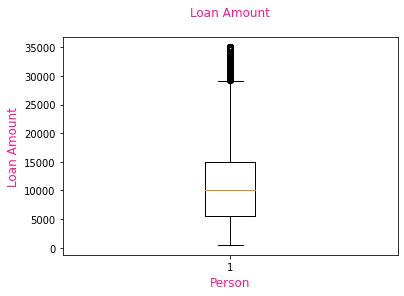

In [41]:
#Ploting the box plot to detect the outlier
#boxplot for loan_amount
plt.boxplot(data['loan_amnt'])
plt.title("Loan Amount\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Person", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel("Loan Amount", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.show()

In [42]:
#Removing the Outlier 
# Upper bound
upper = np.where(data['loan_amnt'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['loan_amnt'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

New Shape:  (38487, 46)


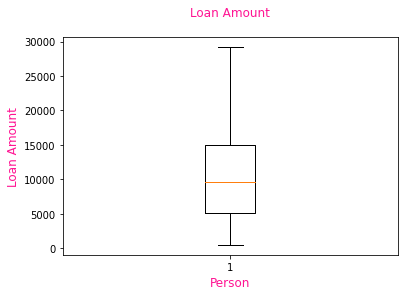

In [43]:
#Plotting the box plot to verify if Outlier on loan_amnt column has been removed.
#Ploting the box plot to detect the outlier
#boxplot for loan_amount
plt.boxplot(data['loan_amnt'])
plt.title("Loan Amount\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Person", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel("Loan Amount", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.show()

# **Univariate Analysis**

Case 1:The loan amount is between 0 to 35000.Mean is around 10000

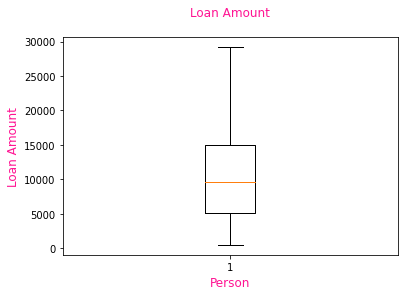

In [44]:
#boxplot for loan_amount
plt.boxplot(data['loan_amnt'])
plt.title("Loan Amount\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Person", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel("Loan Amount", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.show()


Case 2 :People are selecting 36 months of period more than 60 months time span for filling the loan amount

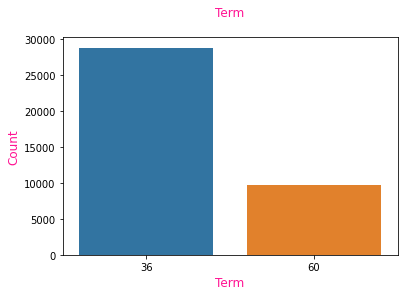

In [45]:
#Term- The number of payments on the loan. Values are in months and can be either 36 or 60.
#Univariate Ordered Categorical Variables
sns.countplot(x = data['term'])

plt.title("Term\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Term", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel("Count", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.show()

#Observation
#The ones who have taken the term of 36 months they are more likely to be Charged off
#than the ones who have taken 60 months time.

Case 3: Interest Rate where Mean is 12.1%

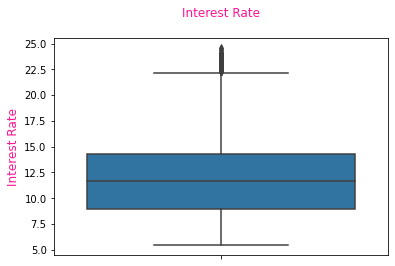

In [46]:
#Interest Rate on the loan
sns.boxplot(y = data['int_rate'])
plt.title("Interest Rate\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel("Interest Rate", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.show()

#Observation
#Interest Rate mean is 12.1%
#Its 25th and 75th percentile is between 10 to 15 percent

Case 4: Grade A and B have majority of the loans.

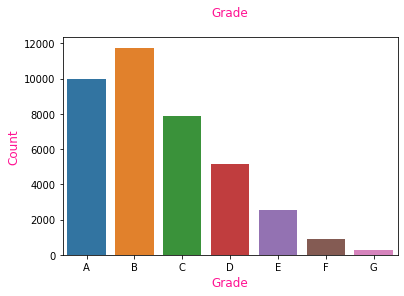

In [47]:
#LC assigned loan grade(A-G)
#Univariate Ordered Categorical Variables
sns.countplot(x = data['grade'])
plt.title("Grade\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Grade", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel("Count", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.show()

#Observation
#A and B grade have majority of the loans

Case 5: Mostly people have employment length greater than 10 years and above

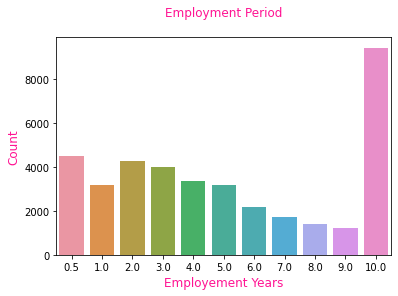

In [48]:
#EMPLOYMENT LENGTH IN YEARS.
sns.countplot(x = data['emp_length'])
plt.title("Employment Period\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.xlabel("Employement Years", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})
plt.show()

#Observation
#Mostly people have employment length greater than 10 years and above

Case 6: Home Ownership Status provided by borrower is RENT And OWN is the least

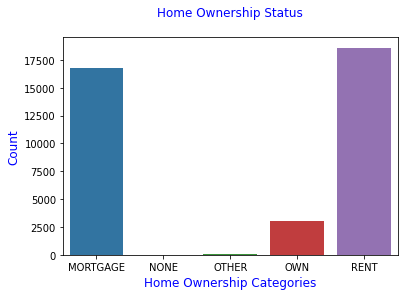

In [49]:
#The home ownership status provided by the borrower during registration
#Univariate UnOrdered Categorical Variables
sns.countplot(x = data['home_ownership'])
plt.title("Home Ownership Status\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Home Ownership Categories", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#The ones who have taken loan are on Rent as mentioned their status during the time of registration

Case 7 : Verfication Status - Mostly borrower's income has not been verified

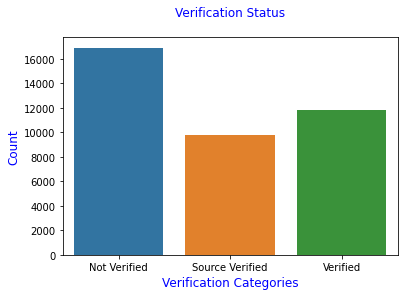

In [50]:
#Indicates if income was verified by LC, not verified, or if the income source was verified
sns.countplot(x = data['verification_status'])
plt.title("Verification Status\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Verification Categories", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#Mostly borrower's income has not been verified

Case 8 :  Loan Status - Almost loan is fully paid

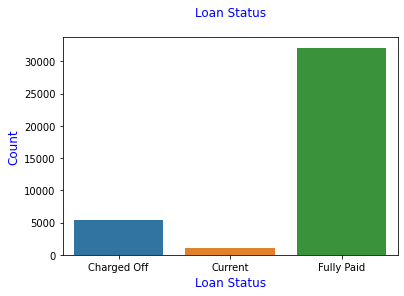

In [51]:
#Current status of the loan (Fully Paid, Charged Off, Current)
sns.countplot(x = data['loan_status'])
plt.title("Loan Status\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#Almost laon is fully paid

Case 9 :Debt_Consolidation Category provided by the borrower for the loan request is higher

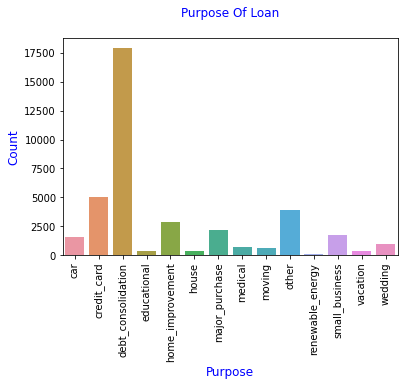

In [52]:
#A category provided by the borrower for the loan request.
sns.countplot(x = data['purpose'])
plt.title("Purpose Of Loan\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Purpose", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation = 90)
plt.show()

#Observation
#Debt_Consolidation is the maximum provided category by the borrower for the loan request.

Case 10 : CA is the state with highest borrower's

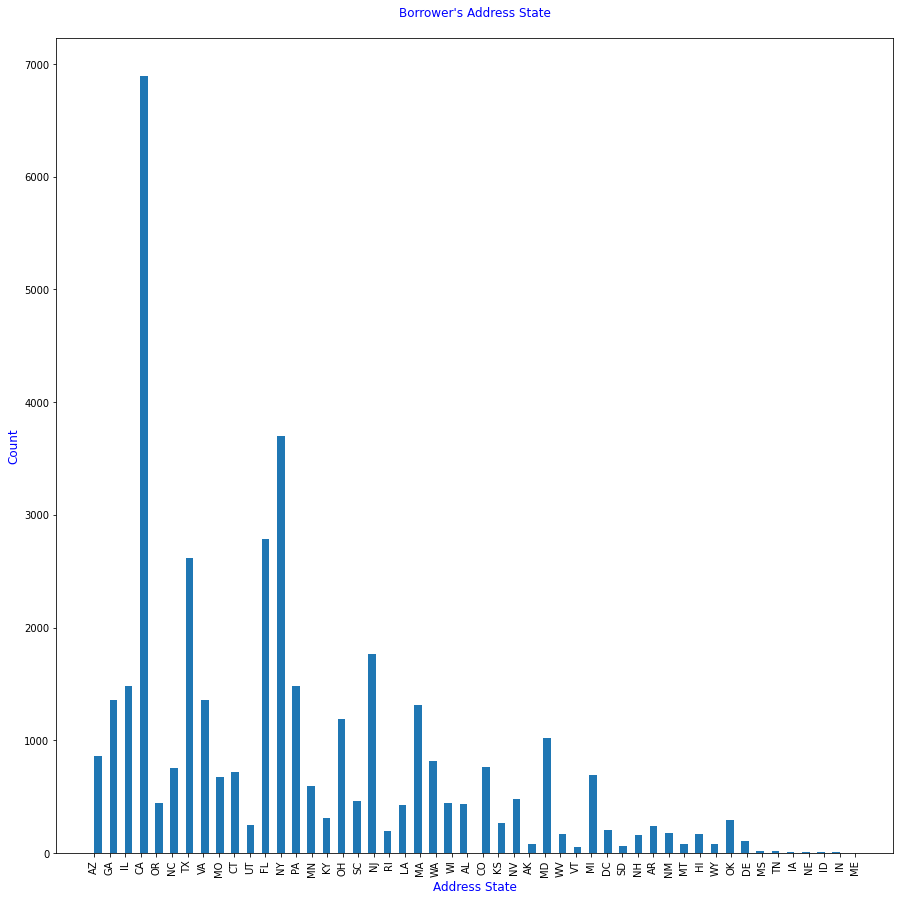

In [53]:
#The state provided by the borrower in the loan application
from IPython.core.pylabtools import figsize
plt.figure(figsize=(15, 15))
plt.hist(data['addr_state'], bins=100)
plt.title("Borrower's Address State\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Address State", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation = 90)
plt.show()

#Observation
#Applicants from the state CA are having high probability to be default

Case 11: These three variables have nearly same value so we can take any of the variables for analysis.[loan_amnt, funded_amnt, funded_amnt_inv]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

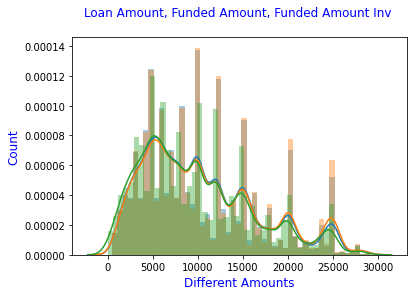

In [54]:
#The total amount committed to that loan at that point in time.
sns.distplot(data['funded_amnt'])
sns.distplot(data['loan_amnt'])
sns.distplot(data['funded_amnt_inv'])
plt.title("Loan Amount, Funded Amount, Funded Amount Inv \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Different Amounts", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#These three variables have nearly same value so we can take any of the variables for analysis.[loan_amnt, funded_amnt, funded_amnt_inv]

Case 12 : Yearly Income In Lakhs is less than 5 Lakhs

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


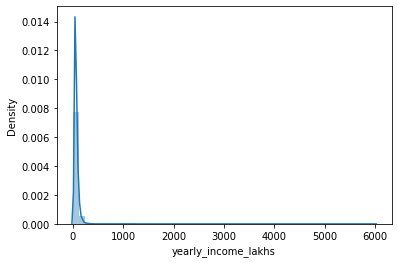

In [55]:
sns.distplot(data['yearly_income_lakhs'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


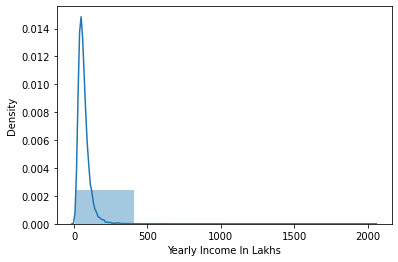

In [56]:
#Only 2 applicant having yearly salary greater than 30 lakhs
sns.distplot(data[data['yearly_income_lakhs'] < 3000]['yearly_income_lakhs'], bins=5)
plt.xlabel('Yearly Income In Lakhs')
plt.show()

Case 13 : FinancialGainOrLoss Difference  between Charged Off and Fully Paid 

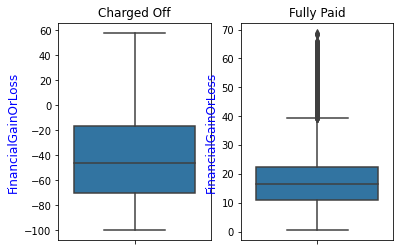

In [57]:
plt.subplot(1,2,1)
plt.title('Charged Off')
sns.boxplot(y=data[data.loan_status == 'Charged Off'].FinancialGainOrLoss)
plt.ylabel('FinancialGainOrLoss', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})

plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y = data[data.loan_status == 'Fully Paid'].FinancialGainOrLoss)
plt.ylabel('FinancialGainOrLoss', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()


Case 14 : Below plots show that most of the Loan amounts are in range of 5000 - 15000

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


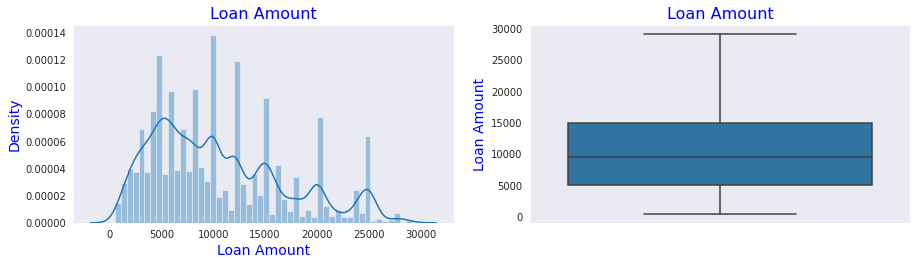

In [58]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8))
sns.set_style("dark")
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['loan_amnt'])
ax.set_title('Loan Amount',fontsize=16,color='blue')
ax.set_xlabel('Loan Amount',fontsize=14,color='blue')
ax.set_ylabel('Density',fontsize=14,color='blue')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['loan_amnt'])
ax.set_title('Loan Amount',fontsize=16,color='blue')
ax.set_ylabel('Loan Amount',fontsize=14,color='blue')
plt.show()

Case 15:Below plots show that most of the Employment Length is greater than 10

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


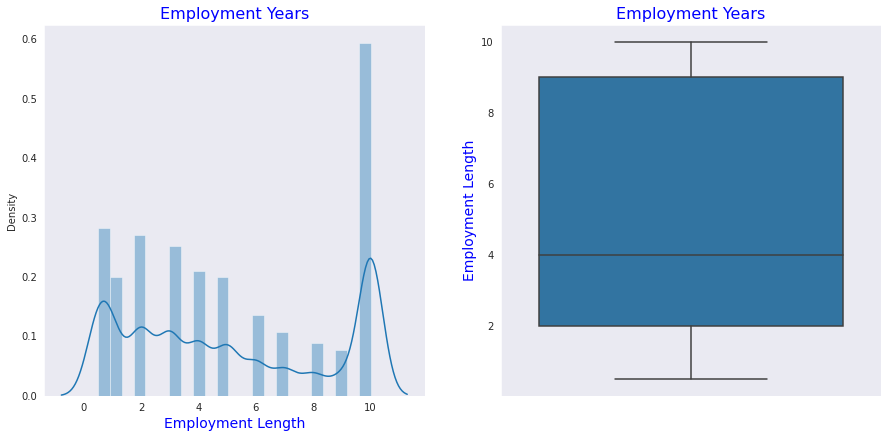

In [59]:
# Univariate Analysis on Employment Length-Quantitative Variables

plt.figure(figsize=(15,15))
# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(data['emp_length'])
ax.set_title('Employment Years',fontsize=16,color='blue')
ax.set_xlabel('Employment Length',fontsize=14,color='blue')
# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(y=data['emp_length'])
ax.set_title('Employment Years',fontsize=16,color='blue')
ax.set_ylabel('Employment Length',fontsize=14,color='blue')
plt.show()

Case 16 : Box plot for revolving credit

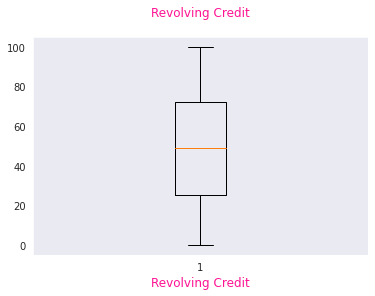

In [60]:
#boxplot for revoving Credit
plt.boxplot(data['revol_util'])
plt.title("Revolving Credit\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Revolving Credit", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.show()
#Observation
#The mean for revolving credit is 50 %

Case 17 : Revolving Balance

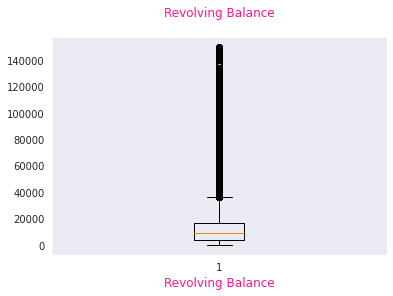

In [61]:
#boxplot for revoving Credit
plt.boxplot(data['revol_bal'])
plt.title("Revolving Balance\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

#Labeling Axes
plt.xlabel("Revolving Balance", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : '#FF1493'})

plt.show()

#Observation
#The revolving balance ranges between 0 to 25000 only and many outliers values are also present.

# **Segmented Analysis**

Case 1 : For loan status Mean, 25% and 75% of fully paid and charged off is almost same.

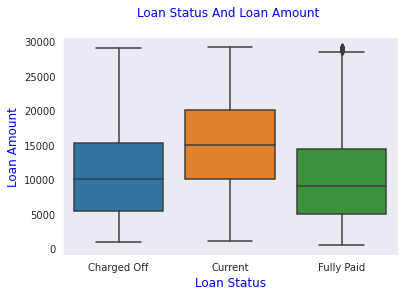

In [62]:
sns.boxplot(x = data['loan_status'], y = data['loan_amnt'])
plt.title("Loan Status And Loan Amount \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Loan Amount', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Case 2: Majority of loan is provided for the debt consolidation purpose and has been fully paid.

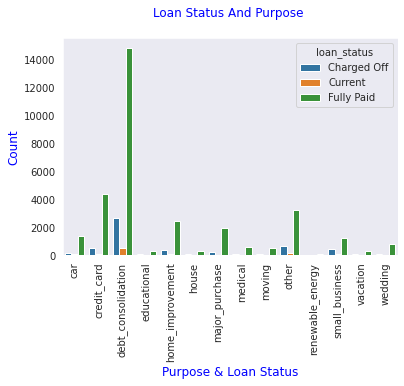

In [63]:
#Univariate Segmented Analysis - Unordered Categorical Variables
sns.countplot(x = data['purpose'], hue =data['loan_status'])
plt.title("Loan Status And Purpose \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Purpose & Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation=90)
plt.show()

Case 3:  For State CA its the highest and loan has been fully paid And For Charged Off CA is highest among all other states

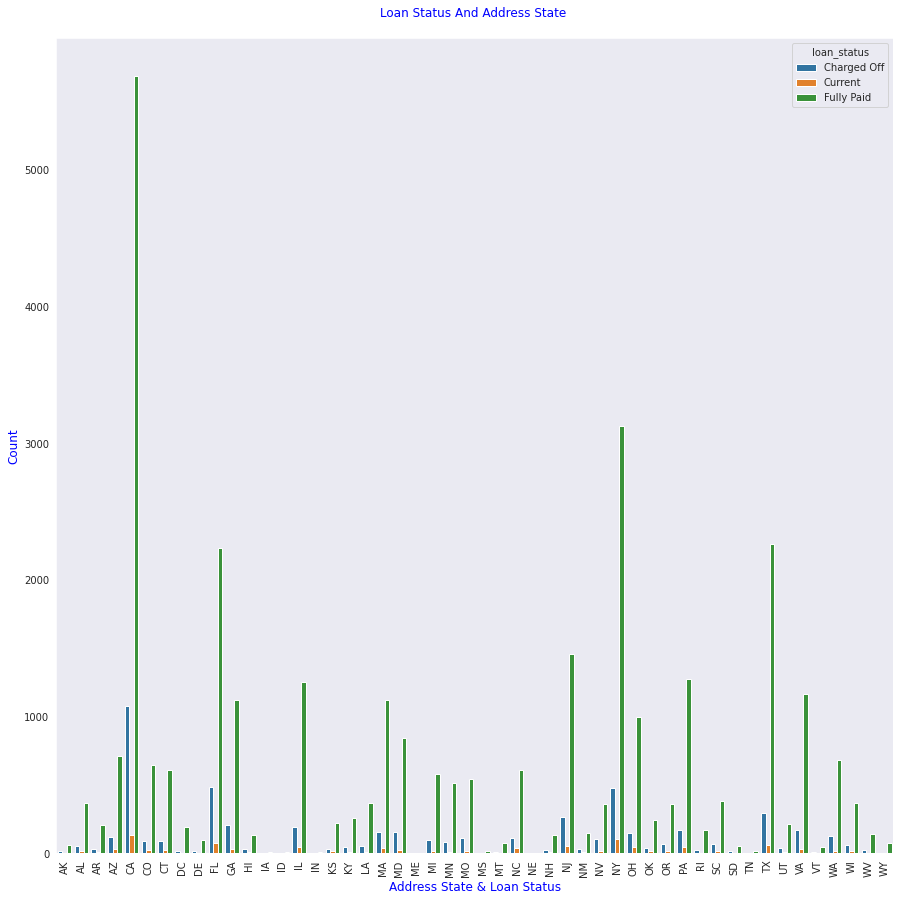

In [64]:
plt.figure(figsize=(15, 15))
sns.countplot(x = data['addr_state'], hue =data['loan_status'])
plt.title("Loan Status And Address State \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Address State & Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xticks(rotation=90)
plt.show()

Case 4 :  Grade and Loan Status

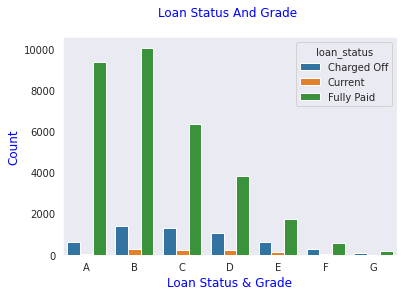

In [65]:
sns.countplot(x = data['grade'], hue =data['loan_status'])
plt.title("Loan Status And Grade \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Loan Status & Grade", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Case 5 - Team and Loan Status

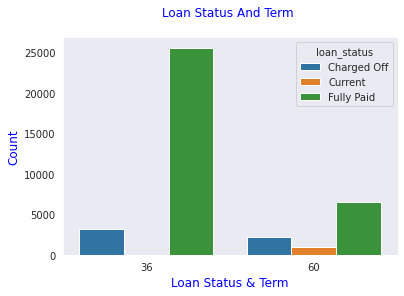

In [66]:
sns.countplot(x = data['term'], hue =data['loan_status'])
plt.title("Loan Status And Term \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Loan Status & Term", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Case 6 Term And Home Ownership

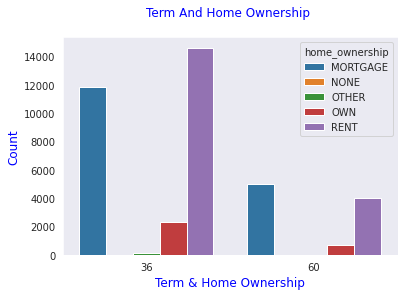

In [67]:
sns.countplot(x = data['term'], hue =data['home_ownership'])
plt.title("Term And Home Ownership \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Term & Home Ownership", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Case 7 : Emp_Length And Loan Status

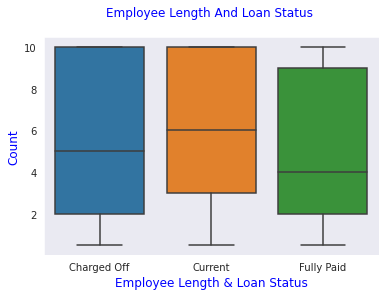

In [68]:
sns.boxplot(x = data['loan_status'], y = data['emp_length'])
plt.title("Employee Length And Loan Status \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Employee Length & Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Case 8 : Verified Status And Loan Status

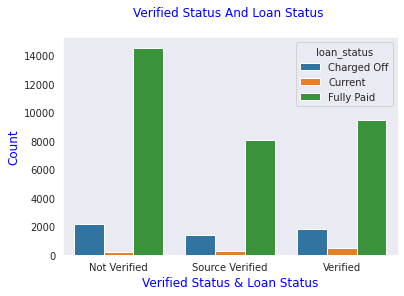

In [69]:
sns.countplot(x = data['verification_status'], hue =data['loan_status'])
plt.title("Verified Status And Loan Status \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Verified Status & Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

Case 9 : Loan Status And Home Ownership

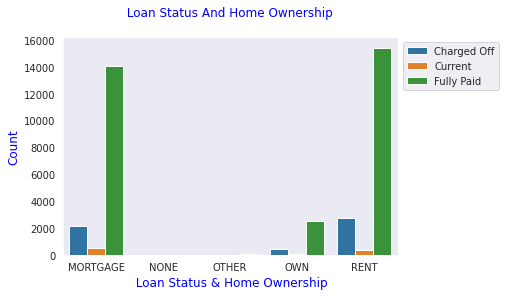

In [70]:
#Unordered Categorical Variables
sns.countplot(x = data['home_ownership'], hue =data['loan_status'])
plt.legend(bbox_to_anchor = (1,1))
plt.title(" Loan Status And Home Ownership \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel(" Loan Status & Home Ownership", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation 
#Loan Status (Fully Paid) is highest for Home Ownership(Mortage, Own and Rent)
#While Charged Off is least for Own.
#And for Mortage and Rent is less than Fully paid but greater than Current

Case 10: Emp_Length and Loan Status CountPlot

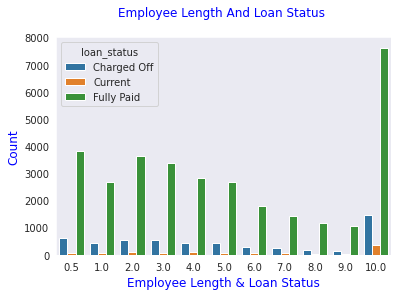

In [71]:
sns.countplot(x = data['emp_length'], hue =data['loan_status'])
plt.title("Employee Length And Loan Status \n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel("Employee Length & Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Count', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

# **Bivariate Analysis**

Case 1 : Relation btw public bankruptcies & Yearly Income in Lakhs

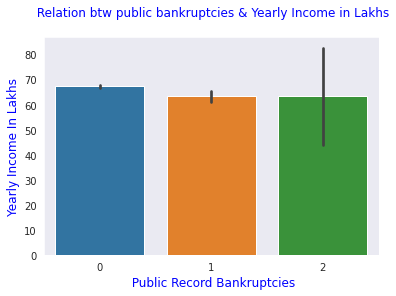

In [72]:

sns.barplot(x= data['pub_rec_bankruptcies'], y= data['yearly_income_lakhs'])
plt.title(" Relation btw public bankruptcies & Yearly Income in Lakhs\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel(" Public Record Bankruptcies", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Yearly Income In Lakhs', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#The ones who have higher yearly income are most likely to have loan status fully paid

Case 2: Yearly Income in Lakhs Vs Grade Relationship

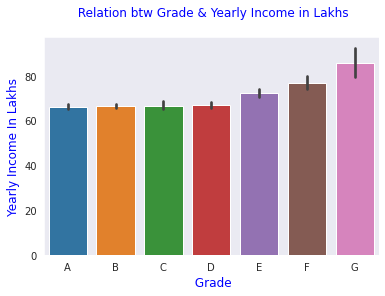

In [73]:
sns.barplot(x= data['grade'], y= data['yearly_income_lakhs'])
plt.title(" Relation btw Grade & Yearly Income in Lakhs\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel(" Grade", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('Yearly Income In Lakhs', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#Lower the grade higher is the yearly income in lakhs(For Example G has higher income)

Case 3: FinancialGainOrLoss Vs Loan Status Relationship

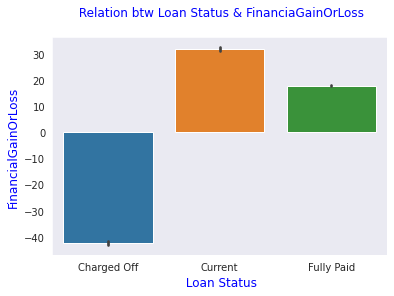

In [74]:
sns.barplot(x= data['loan_status'], y= data['FinancialGainOrLoss'])
plt.title(" Relation btw Loan Status & FinanciaGainOrLoss\n", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.xlabel(" Loan Status", fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.ylabel('FinancialGainOrLoss', fontdict = {'fontsize' : 12, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

#Observation
#Charged Off Value has considered as loss for the company as all values are in negative
#That is total payment is less than Funded amount
#While for Fully Paid there is financial gain.

Case 4:Bivariate Analysis - Correlation Matrix-Quantitative Variables

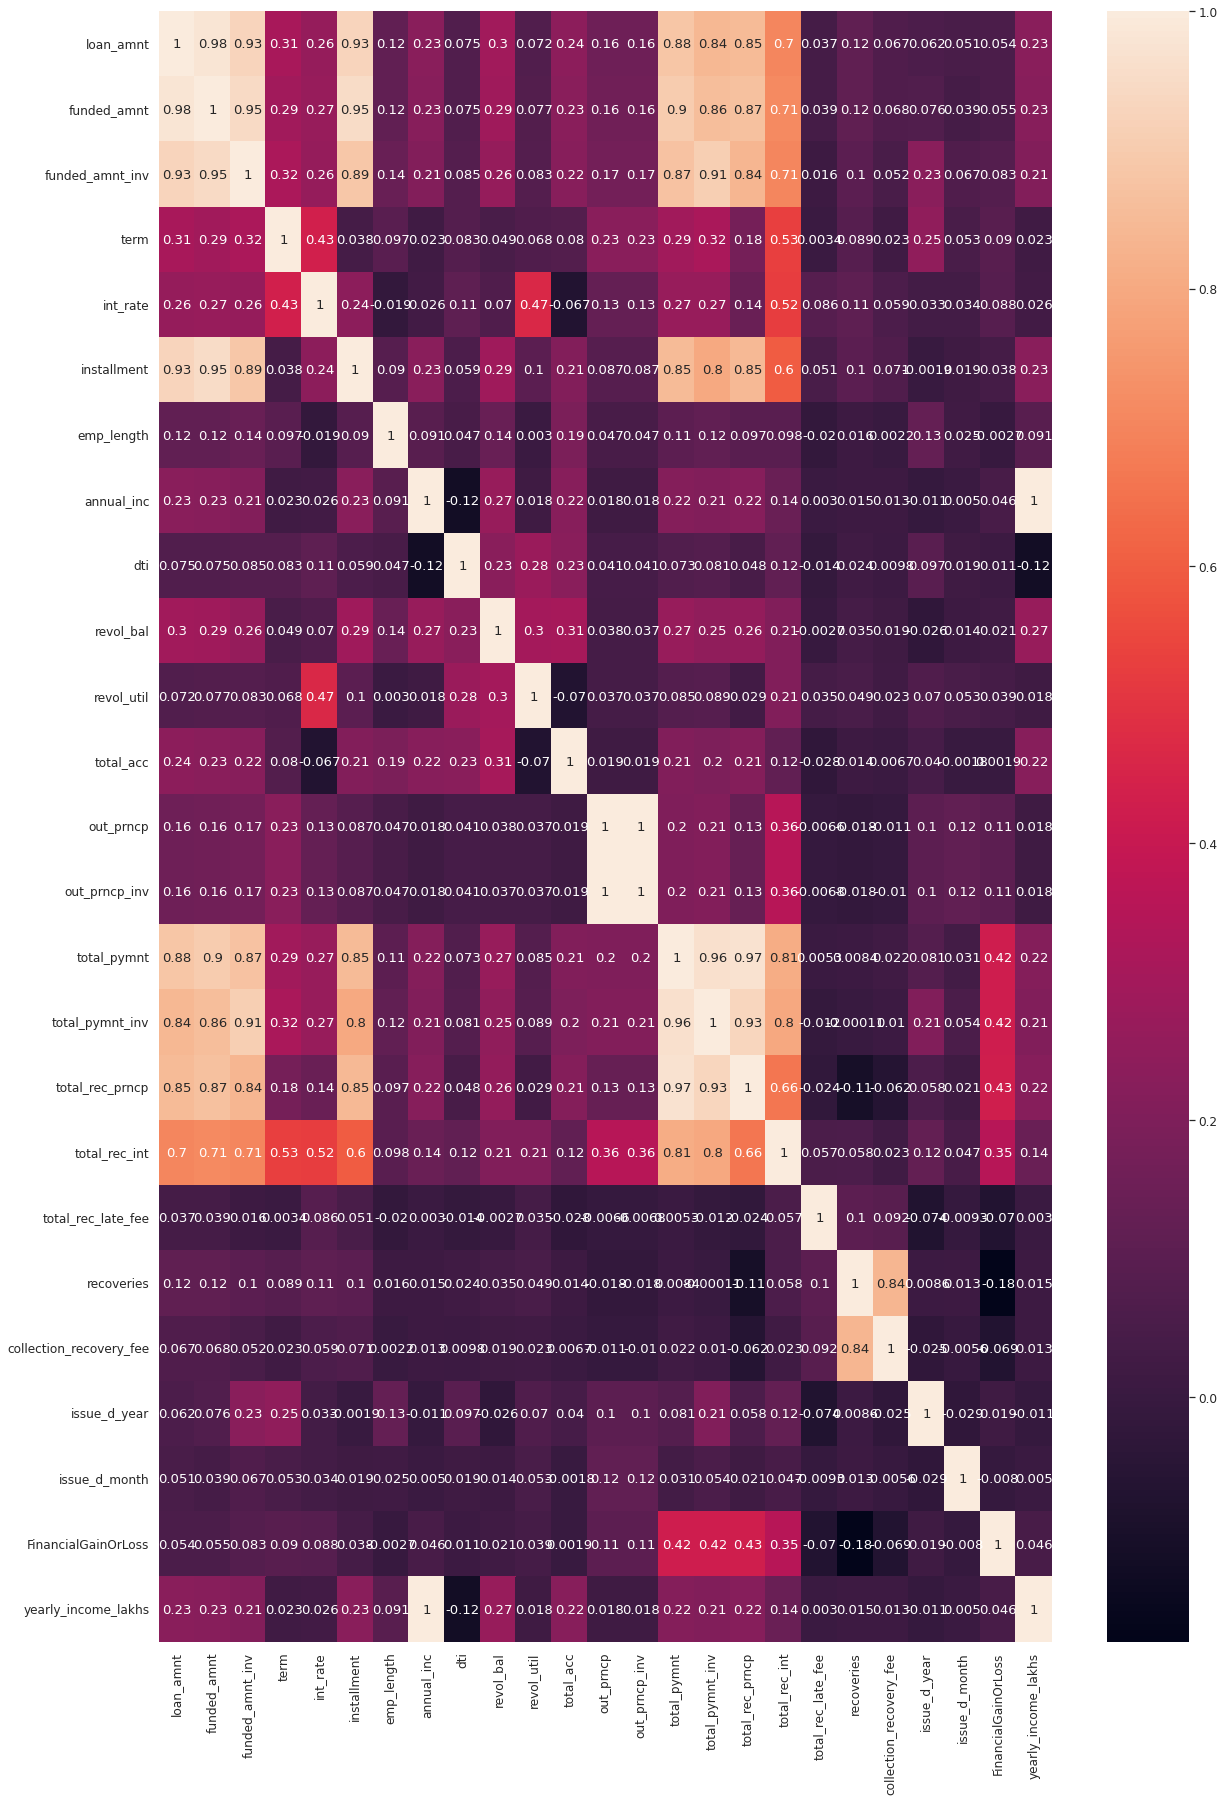

In [75]:

plt.figure(figsize=(20,30))
sns.set(font_scale=1.1)
sns.heatmap(data.corr(), annot=True)
plt.show()

# Observation is that Loan amount, investor amount, funding amount are strongly correlated.
# Annual income with DTI(Debt-to-income ratio) is negatively correalted.
# positive correlation between annual income and employment years.
# That means income increases with work experience ;)

Case 5: Bivariate Analysis - Term of loan vs Interest Rate

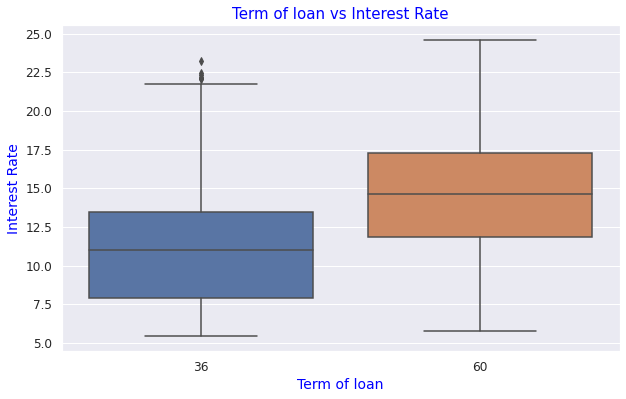

In [76]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='int_rate', x='term', data =data)
ax.set_title('Term of loan vs Interest Rate',fontsize=15,color='blue')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'blue')
ax.set_xlabel('Term of loan',fontsize=14,color = 'blue')
plt.show()

# Observations:
# It is clear that avearge intrest rate is higher for 60 months loan term.
# Most of the loans issued for longer term had higher intrest rates for repayement.

Case 6: Bivariate Analysis - Grade vs Interest Rate

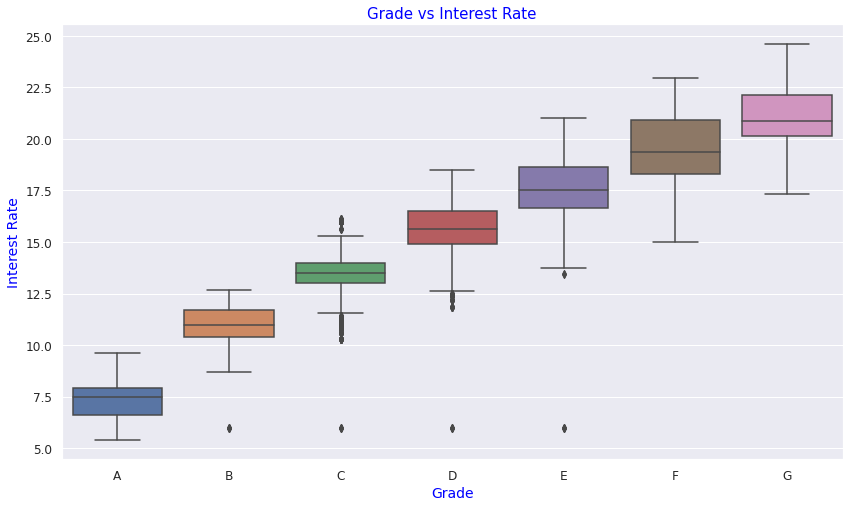

In [77]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='grade', data =data,order = 'ABCDEFG')
ax.set_title('Grade vs Interest Rate',fontsize=15,color='blue')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'blue')
ax.set_xlabel('Grade',fontsize=14,color = 'blue')
plt.show()

# Observations:
# A-grade is a top letter grade for a lender to assign to a borrower.
# The higher the borrower's credit grade,the lower the interest rate offered to that borrower on a loan.

Derived Columns Analysis

In [78]:
# Derived columns
# categorise loan amounts into buckets which will help in analysis further in bivariate analysis.
data['Categories_loan_amount'] = pd.cut(data['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual incomes into buckets which will help in analysis further in bivariate analysis.
data['Categories_Annual_Income'] = pd.cut(data['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into buckets which will help in analysis further in bivariate analysis.
data['Categories_Interest_Rate'] = pd.cut(data['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

data['Category_dti'] = pd.cut(data['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

data.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,last_credit_pull_d_month,last_credit_pull_d_year,issue_d_year,issue_d_month,FinancialGainOrLoss,yearly_income_lakhs,Categories_loan_amount,Categories_Annual_Income,Categories_Interest_Rate,Category_dti
0,5000.00,5000.00,4975.00,36,10.65,162.87,B,B2,10.00,RENT,24000.00,Verified,2011-12-01,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648.00,83.70,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0,May,16,2011,12,17.26,24.00,0-7000,20000-40000,10-13,NaN


In [79]:
#Analysing the two variables(Annual Income Vs Loan Status)
annual_loan = data.groupby(['Categories_Annual_Income', 'loan_status']).loan_status.count().unstack().fillna(0)

annual_loan.columns = pd.Index(list(annual_loan.columns))
annual_loan['loan_Types'] = annual_loan['Charged Off'] + annual_loan['Current'] + annual_loan['Fully Paid']
annual_loan['Fully Paid Ratio'] = annual_loan['Fully Paid'] / annual_loan['loan_Types']
annual_loan['Charged Off Ratio'] = annual_loan['Charged Off'] / annual_loan['loan_Types']
annual_loan.sort_values('Fully Paid Ratio', ascending = True)


,Charged Off,Current,Fully Paid,loan_Types,Fully Paid Ratio,Charged Off Ratio
Categories_Annual_Income,,,,,,
0-20000,237,9,943,1189,0.79,0.20
20000-40000,1514,169,7004,8687,0.81,0.17
40000-60000,1705,340,9494,11539,0.82,0.15
60000-80000,958,200,6435,7593,0.85,0.13
80000 +,959,288,8218,9465,0.87,0.10


Case 7: Bivariate Analysis -Categories_Annual_Income vs Interest Rate

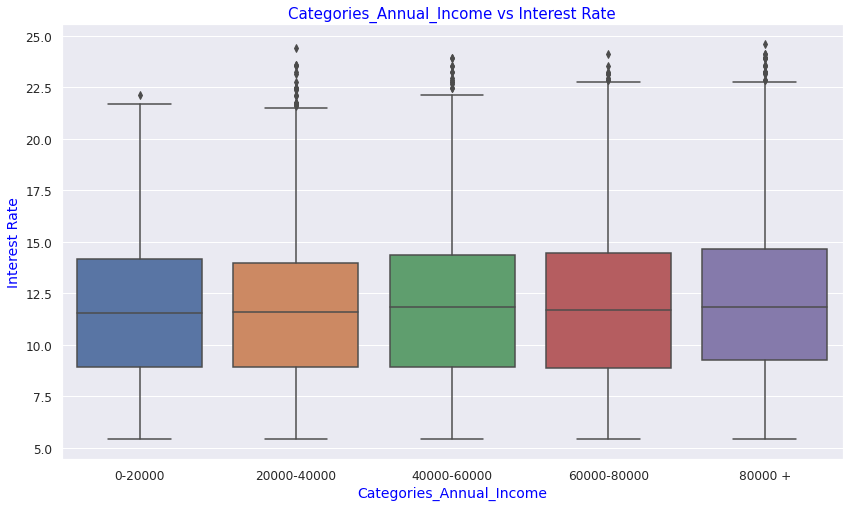

In [80]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='Categories_Annual_Income', data =data)
ax.set_title('Categories_Annual_Income vs Interest Rate',fontsize=15,color='blue')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'blue')
ax.set_xlabel('Categories_Annual_Income',fontsize=14,color = 'blue')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term
# longer the loan term more the interest rate.

Case 8: Bivariate Analysis - dti vs Interest Rate

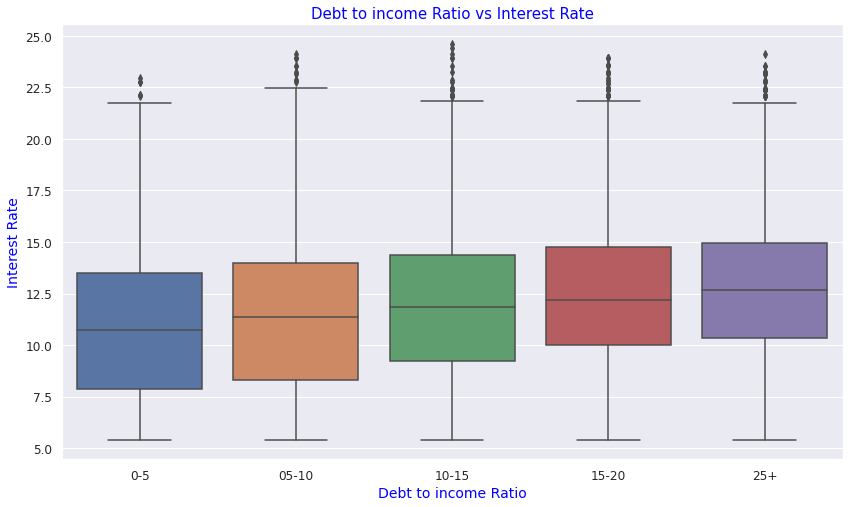

In [81]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='Category_dti', data = data)
ax.set_title('Debt to income Ratio vs Interest Rate',fontsize=15,color='blue')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'blue')
ax.set_xlabel('Debt to income Ratio',fontsize=14,color = 'blue')
plt.show()

# Observations:
# If your DTI is low enough you may get a lower interest rate.
# Plot shows no significant variation but there is slight increase in interest rate with increase in DTI.


Case 9:Bivariate analysis to show variation of annual income across grade for every loan status.

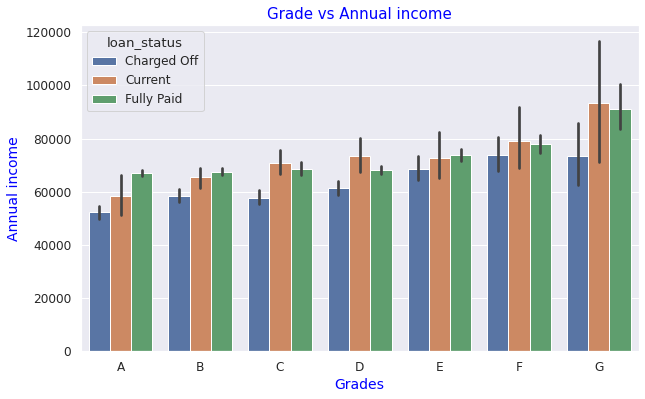

In [82]:
plt.figure(figsize=(10,6))
ax=sns.barplot(x='grade', y='annual_inc', hue="loan_status", data=data, estimator=np.mean,order='ABCDEFG')
ax.set_title('Grade vs Annual income',fontsize=15,color='blue')
ax.set_ylabel('Annual income',fontsize=14,color = 'blue')
ax.set_xlabel('Grades',fontsize=14,color = 'blue')
plt.show()

# Observations:
# From this we can conclude that the ones getting 'charged off' have lower annual incomes than the ones 
# who'paid fully' for every grade

Case 10: Bivariate Analysis - year vs Interest Rate

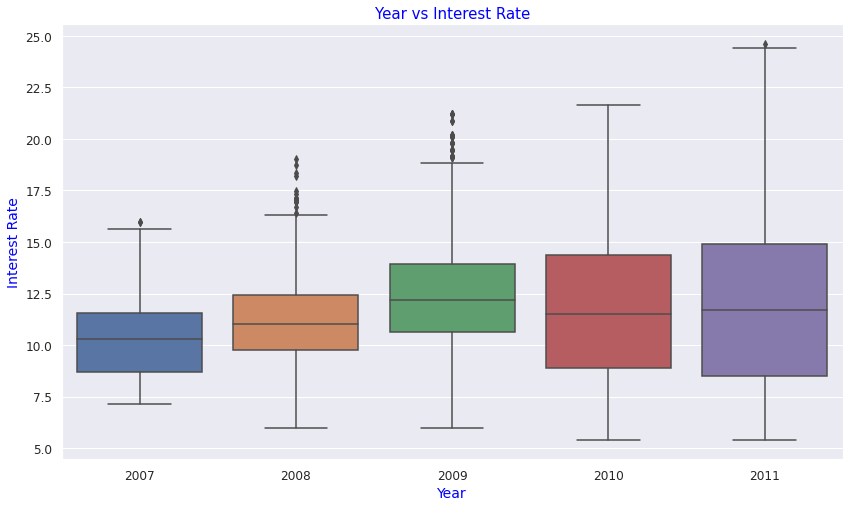

In [83]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='issue_d_year' ,data = data)
ax.set_title('Year vs Interest Rate',fontsize=15,color='blue')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'blue')
ax.set_xlabel('Year',fontsize=14,color = 'blue')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.

Case 11:  Bivariate Analysis - year vs Interest Rate Along with loan status

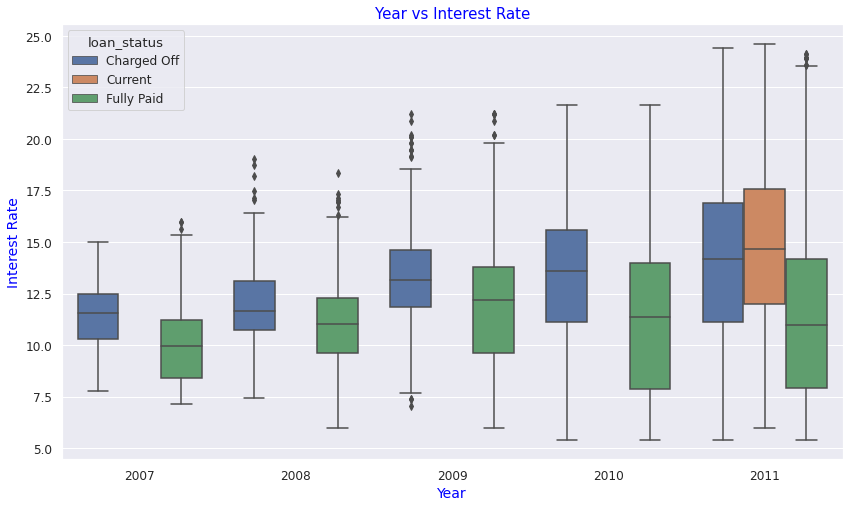

In [84]:
plt.figure(figsize=(14,8))
ax = sns.boxplot(y='int_rate', x='issue_d_year', hue =  'loan_status' ,data = data)
ax.set_title('Year vs Interest Rate',fontsize=15,color='blue')
ax.set_ylabel('Interest Rate',fontsize=14,color = 'blue')
ax.set_xlabel('Year',fontsize=14,color = 'blue')
plt.show()

# Observations:
# Plot shows intrest rate is increasing slowly with increase in year.
#As well as people with Charged Off have higher rate of interest.

Case 12 : Loan Granted Per Year

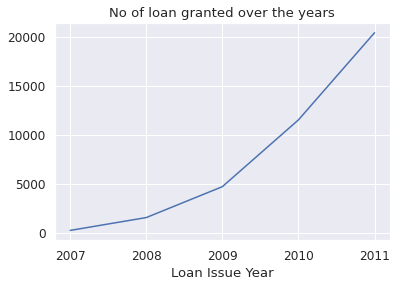

In [88]:
annual_data = data.groupby('issue_d_year')['loan_status'].count()

annual_data.plot.line(x_compat=True)
plt.xticks(np.arange(min(annual_data.index), max(annual_data.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

#Observation
#There is always increase is issuing the loan every year.

Case 13 : Relation between Term and Revolving Credit

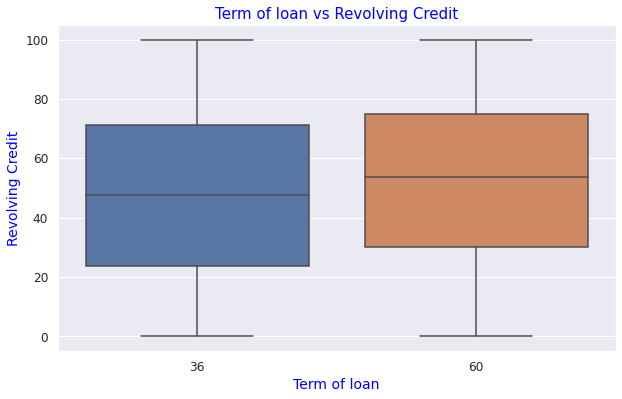

In [87]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(y='revol_util', x='term', data =data)
ax.set_title('Term of loan vs Revolving Credit',fontsize=15,color='blue')
ax.set_ylabel('Revolving Credit',fontsize=14,color = 'blue')
ax.set_xlabel('Term of loan',fontsize=14,color = 'blue')
plt.show()

# Observations:
# It is clear that avearge revolving credit is higher for 60 months loan term.
# Most of the loans issued for longer term had higher revolving credit for repayment.